# EDA
    

Empezando con el analisis exploratorio de datos, ralizaremos verificaciones de datos nulos, duplicados y formatos de datos para posteriormente realizar el analisis de estos.

In [4]:
# Librerias a usar
import pandas as pd
import matplotlib.pyplot as plt
# Extraccion de los datos a usar
df_reviews = pd.read_csv('aus_user_revs.csv')
df_items = pd.read_csv('aus_users_items.csv')
df_games = pd.read_csv('steam_games.csv')

# Reviews

In [5]:
df_reviews.head(5)

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,NaN,"Posted November 5, 2011.",NaN,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,NaN,"Posted July 15, 2011.",NaN,22200,No ratings yet,True,It's unique and worth a playthrough.
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,NaN,"Posted April 21, 2011.",NaN,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,http://steamcommunity.com/id/js41637,NaN,"Posted June 24, 2014.",NaN,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
4,js41637,http://steamcommunity.com/id/js41637,NaN,"Posted September 8, 2013.",NaN,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...


In [6]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      59305 non-null  object
 1   user_url     59305 non-null  object
 2   funny        8151 non-null   object
 3   posted       59305 non-null  object
 4   last_edited  6140 non-null   object
 5   item_id      59305 non-null  int64 
 6   helpful      59305 non-null  object
 7   recommend    59305 non-null  bool  
 8   review       59275 non-null  object
dtypes: bool(1), int64(1), object(7)
memory usage: 3.7+ MB


In [7]:
# Cambio de formatos de datos
# La columna 'posted' se encuentra en formato string y se cambiara a un formato de fechas en una nueva columna llamada 'posted_date'
import re
from datetime import datetime
# Define una función para convertir las fechas
def convertir_a_fecha(fecha_str):
    # Usar una expresión regular para extraer el mes, el día y el año
    match = re.search(r'(\w+) (\d+), (\d+)', fecha_str)
    if match:
        mes_str, dia, año = match.groups()
        mes = datetime.strptime(mes_str, "%B").month  # Convertir el nombre del mes a número
        fecha = datetime(int(año), mes, int(dia))
        return fecha
    else:
        return None

# Aplica la función para convertir la columna 'posted_date' a formato de fecha
df_reviews['posted_date'] = df_reviews['posted'].apply(convertir_a_fecha)

# Eliminar los valores que no tienen un año especifico por lo que se asumiran como datos nulos
df_reviews = df_reviews.dropna(subset=['posted_date'])

# Eliminar las filas con datos nulos de la columna review
df_reviews = df_reviews.dropna(subset=['review'])

# Eliminar las filas duplicadas
df_reviews = df_reviews.drop_duplicates(keep='first')

# Convertir los datos de la columna 'item_id' a formato entero
df_reviews['item_id'] = df_reviews['item_id'].astype(int)

#Eliminar la columna 'posted' que ya no sera utilizada y las columnas 'funny' y 'last edited' que tienen muchos nulos y no serviran para el analisis
df_reviews = df_reviews.drop('posted', axis=1)
df_reviews = df_reviews.drop('funny', axis=1)
df_reviews = df_reviews.drop('last_edited', axis=1)



# Analisis de sentimiento

In [8]:

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Descargar el lexicon necesario para el análisis de sentimientos
nltk.download('vader_lexicon')

# Crear una instancia del analizador de sentimientos
sia = SentimentIntensityAnalyzer()
# Convertimos la columna 'review' en tipo string para aplicar nuestrop modelo de analisis de sentimiento
df_reviews['review'] = df_reviews['review'].astype(str)

# Supongamos que tienes un DataFrame llamado df con una columna "reviews"
# Calcula el puntaje de sentimiento para cada reseña y crea una nueva columna "sentimiento"
df_reviews['sentimiento'] = df_reviews['review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Define umbrales para clasificar las reseñas en positivas, neutrales y negativas
umbral_positivo = 0.2
umbral_negativo = -0.2

# Crea una nueva columna "sentimiento_etiqueta" para clasificar en positivo, neutral y negativo
df_reviews['sentiment_analysis'] = df_reviews['sentimiento'].apply(lambda x: 2 if x > umbral_positivo else (0 if x < umbral_negativo else 1))





[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48471 entries, 0 to 59276
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             48471 non-null  object        
 1   user_url            48471 non-null  object        
 2   item_id             48471 non-null  int32         
 3   helpful             48471 non-null  object        
 4   recommend           48471 non-null  bool          
 5   review              48471 non-null  object        
 6   posted_date         48471 non-null  datetime64[ns]
 7   sentimiento         48471 non-null  float64       
 8   sentiment_analysis  48471 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 3.2+ MB


# Items

In [10]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 8 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id           object
 1   items_count       int64 
 2   steam_id          int64 
 3   user_url          object
 4   item_id           int64 
 5   item_name         object
 6   playtime_forever  int64 
 7   playtime_2weeks   int64 
dtypes: int64(5), object(3)
memory usage: 314.5+ MB


In [11]:

from scipy.stats import zscore

# Asumiendo que ya tienes un DataFrame llamado df y una columna llamada 'columna_de_interes'
z_scores = zscore(df_items['items_count'])
df_items = df_items[(z_scores < 3) & (z_scores > -3)]  # Filtrar valores dentro de 3 desviaciones estándar

# Asumiendo que ya tienes un DataFrame llamado df y una columna llamada 'columna_de_interes'
z_scores = zscore(df_items['playtime_forever'])
df_items = df_items[(z_scores < 3) & (z_scores > -3)]  # Filtrar valores dentro de 3 desviaciones estándar

# Convertir los datos de 'item_name' a minisculas
df_items['item_name'] = df_items['item_name'].str.lower()

# Eliminar la columna 'playtime_2weeks' 
df_items = df_items.drop('playtime_2weeks', axis=1)

# Eliminar la columna 'steam_id' 
df_items = df_items.drop('steam_id', axis=1)

# Eliminar la columna 'user_url' 
df_items = df_items.drop('user_url', axis=1)
# Eliminar la columna 'user_url' 
df_items = df_items.drop('items_count', axis=1)

# Eliminar las filas duplicadas
df_items = df_items.drop_duplicates(keep='first')

# Convertir los datos de la columna 'item_id' a entero
df_items['item_id'] = df_items['item_id'].astype(int)
df_items = df_items[df_items['playtime_forever'] != 0]


In [12]:
df_items

,user_id,item_id,item_name,playtime_forever
0,76561197970982479,10,counter-strike,6
2,76561197970982479,30,day of defeat,7
8,76561197970982479,300,day of defeat: source,4733
9,76561197970982479,240,counter-strike: source,1853
10,76561197970982479,3830,psychonauts,333
...,...,...,...,...
5153202,76561198329548331,304930,unturned,677
5153203,76561198329548331,227940,heroes & generals,43
5153206,76561198329548331,388490,one way to die: steam edition,3
5153207,76561198329548331,521570,you have 10 seconds 2,4


Games

In [13]:
df_games.head(5)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,0.0,761140.0,Kotoshiro
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,0.0,643980.0,Secret Level SRL
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",http://steamcommunity.com/app/670290/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free to Play,0.0,670290.0,Poolians.com
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"['Action', 'Adventure', 'Casual']",http://steamcommunity.com/app/767400/reviews/?...,['Single-player'],0.99,0.0,767400.0,彼岸领域
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"['Action', 'Indie', 'Casual', 'Sports']",http://steamcommunity.com/app/773570/reviews/?...,"['Single-player', 'Full controller support', '...",2.99,0.0,773570.0,NaN


In [14]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32135 entries, 0 to 32134
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24064 non-null  object 
 1   genres        28852 non-null  object 
 2   app_name      32133 non-null  object 
 3   title         30085 non-null  object 
 4   url           32135 non-null  object 
 5   release_date  30068 non-null  object 
 6   tags          31972 non-null  object 
 7   reviews_url   32133 non-null  object 
 8   specs         31465 non-null  object 
 9   price         30758 non-null  object 
 10  early_access  32135 non-null  float64
 11  id            32133 non-null  float64
 12  developer     28836 non-null  object 
dtypes: float64(2), object(11)
memory usage: 3.2+ MB


In [15]:
df_games.isnull().sum()

publisher       8071
genres          3283
app_name           2
title           2050
url                0
release_date    2067
tags             163
reviews_url        2
specs            670
price           1377
early_access       0
id                 2
developer       3299
dtype: int64

In [16]:
# Eliminar los datos nulos de la columna title
df_games = df_games.dropna(subset=['title'])
df_games = df_games.dropna(subset=['publisher'])
df_games = df_games.dropna(subset=['release_date'])


# Sustituir los datos 'Free to play' por 0 en la columna 'price' 
df_games['price'] = pd.to_numeric(df_games['price'], errors='coerce').fillna(0)

# Convertir los datos de la colunmna 'price' a formato float 
df_games['price'] = df_games['price'].astype(float)

# Cambiar el nombre de la columna "id" por "item_id"
df_games = df_games.rename(columns={'id': 'item_id'})

# convertir los datos de la columna 'item_id' a entero
df_games['item_id'] = df_games['item_id'].fillna(0)
df_games['item_id'] = df_games['item_id'].astype(int)

# Analisis

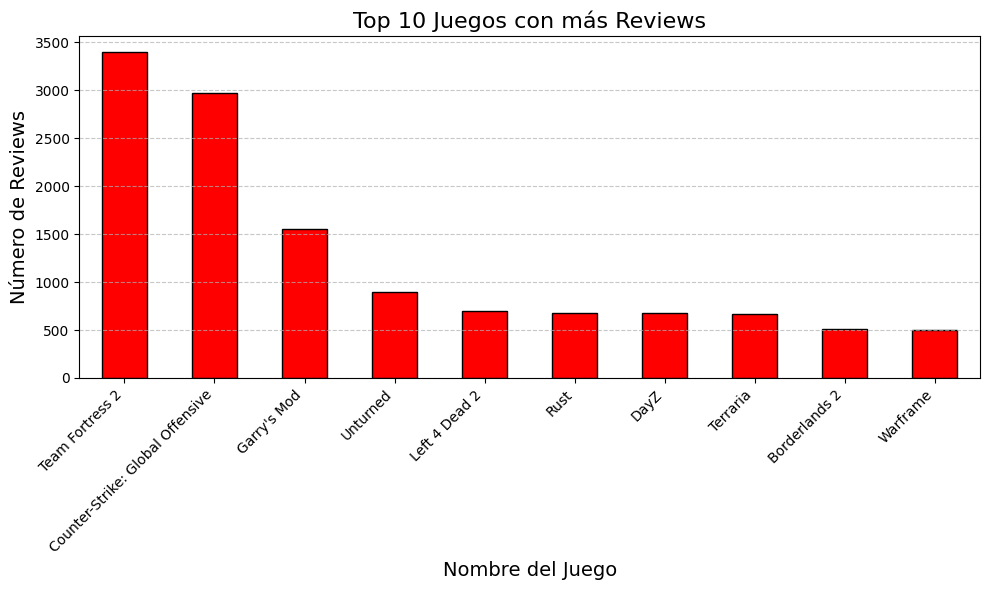

In [17]:
# 10 juegos que mas aprecen en las reviews
# Realiza un merge (fusión) basado en la columna 'id_videojuego'
df_completo = pd.merge(df_reviews, df_games, on='item_id')

# Ahora df_completo contendrá todas las columnas de df_reviews y df_juegos, fusionadas por 'id_videojuego'
# Puedes acceder al nombre del videojuego como df_completo['nombre_videojuego']

# Obtén la cuenta de revisiones por nombre de videojuego
top_10_juegos = df_completo['title'].value_counts().head(10)

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
top_10_juegos.plot(kind='bar', color='red', edgecolor='black')  # Color rojo, borde negro
plt.title('Top 10 Juegos con más Reviews', fontsize=16)  # Título con un tamaño de fuente más grande
plt.xlabel('Nombre del Juego', fontsize=14)  # Etiqueta del eje x con un tamaño de fuente
plt.ylabel('Número de Reviews', fontsize=14)  # Etiqueta del eje y con un tamaño de fuente
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Líneas de cuadrícula horizontales punteadas
plt.tight_layout()  # Ajusta el diseño automáticamente para evitar que los elementos se superpongan
plt.show()

Estos son los 10 juegos con mas reviews es decir que pueden ser los jeugos mas jugados por la comunidad de steam

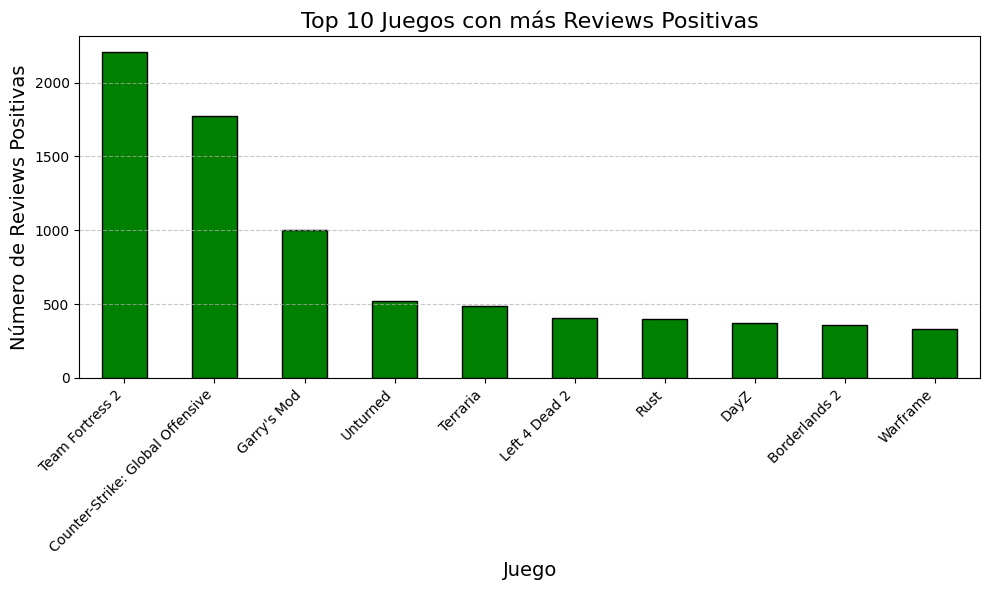

In [18]:
# Juegos con mayor cantidad de sentimientos positivos
# Realiza un merge (fusión) basado en la columna 'id_videojuego'
df_completo = pd.merge(df_reviews, df_games, on='item_id')

# Filtra solo las revisiones recomendadas (número 2)
revisiones_recomendadas = df_completo[df_completo['sentiment_analysis'] == 2]

# Obtén la cuenta de revisiones recomendadas por juego
revisiones_por_juego = revisiones_recomendadas['title'].value_counts().head(10)

# Crea el gráfico de barras para revisiones recomendadas por juego
plt.figure(figsize=(10, 6))
revisiones_por_juego.plot(kind='bar', color='green', edgecolor='black')
plt.title('Top 10 Juegos con más Reviews Positivas', fontsize=16)
plt.xlabel('Juego', fontsize=14)
plt.ylabel('Número de Reviews Positivas', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Esta grafica nos muestra los 10 juegos con mas reviews positivas por cual podemos concluir que son los juegos que mas le gustan a la comunidad y podrian tener las mayores ventas, tambien hay que tener en cuenta que al tener el mayor numero de reviews tambien tendra un numero aldo de reseñas positivas, se recomienda hacer una relacion entre las reseñas postivas y el total de reseñas para asi tener un dato mas preciso

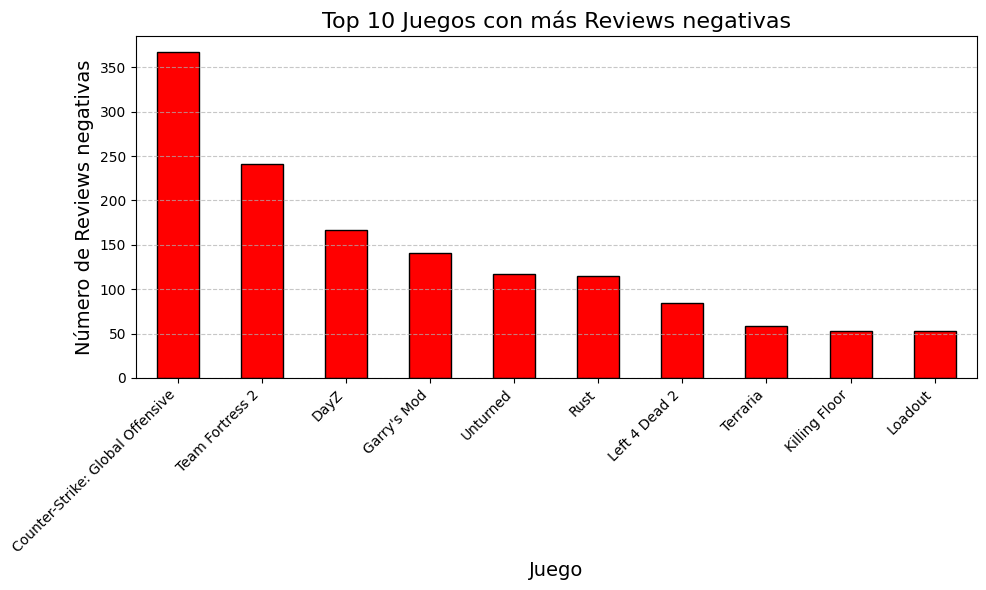

In [19]:
# Juegos con mayor cantidad de sentimientos negativo
# Realiza un merge (fusión) basado en la columna 'id_videojuego'
df_completo = pd.merge(df_reviews, df_games, on='item_id')

# Filtra solo las revisiones recomendadas (número 2)
revisiones_recomendadas = df_completo[df_completo['sentiment_analysis'] == 0]

# Obtén la cuenta de revisiones recomendadas por juego
revisiones_por_juego = revisiones_recomendadas['title'].value_counts().head(10)

# Crea el gráfico de barras para revisiones recomendadas por juego
plt.figure(figsize=(10, 6))
revisiones_por_juego.plot(kind='bar', color='red', edgecolor='black')
plt.title('Top 10 Juegos con más Reviews negativas', fontsize=16)
plt.xlabel('Juego', fontsize=14)
plt.ylabel('Número de Reviews negativas', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Esta conclusion es parecida a la anterior donde podemos ver los juegos con mas reviews negativas es decir probablemente sean los juegos menos gustados 

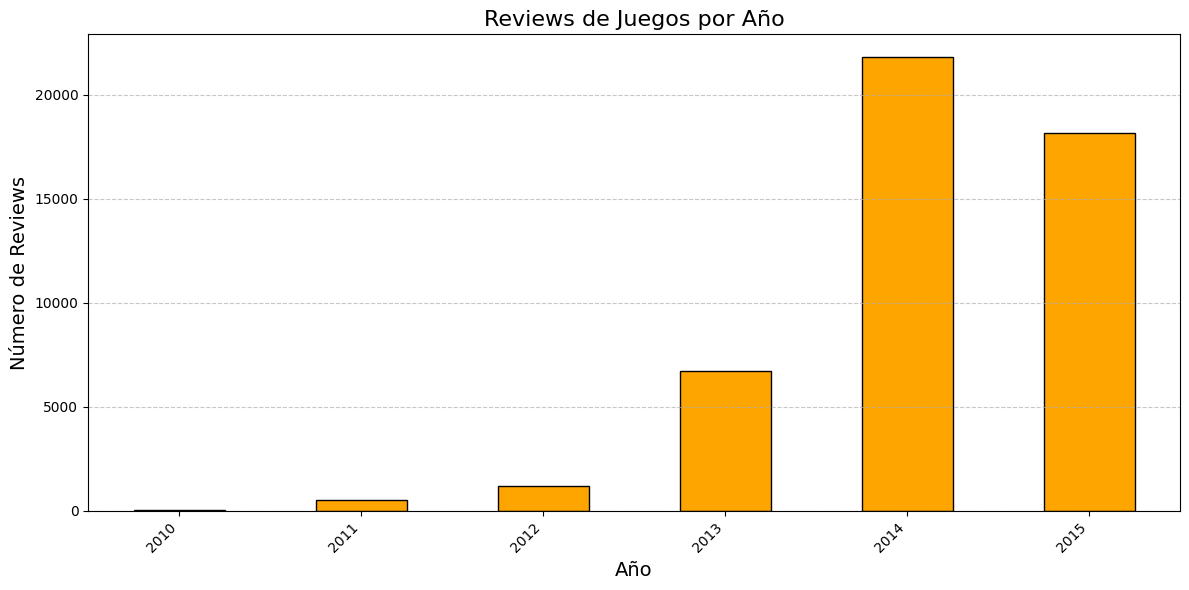

In [20]:
# Años con mas reviews
# Obtén la cuenta de revisiones por año
reviews_por_año = df_reviews['posted_date'].dt.year.value_counts()

# Ordena los resultados por año
reviews_por_año = reviews_por_año.sort_index()

# Crea el gráfico de barras para revisiones por año
plt.figure(figsize=(12, 6))
reviews_por_año.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Reviews de Juegos por Año', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Número de Reviews', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Esta grafica nos muestra los años con mas reviews pealizadas por los usuarios, alli podemos ver un crecimiento muy notable en los años 2014 y 2015 lo cual nos podria indicar el crecimiento de la plataforma en los ultimos años en el numero de reviews pero deberia estar relacionada con el numero total de jugadores

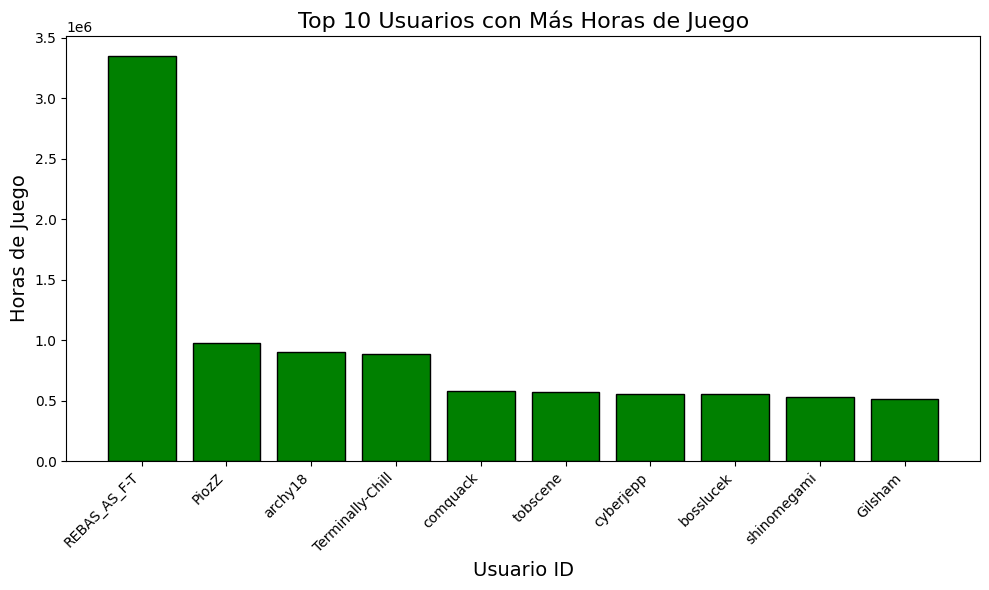

In [21]:
# Jugadores con mas horas de juego
agrupado_por_usuario = df_items.groupby('user_id')['playtime_forever'].sum()

# Ordena el DataFrame resultante en orden descendente
usuarios_con_mas_horas = agrupado_por_usuario.sort_values(ascending=False)

# Toma los primeros 10 usuarios con más horas de juego
top_usuarios_horas = usuarios_con_mas_horas.head(10)

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_usuarios_horas.index, top_usuarios_horas, color='green', edgecolor='black')
plt.title('Top 10 Usuarios con Más Horas de Juego', fontsize=16)
plt.xlabel('Usuario ID', fontsize=14)
plt.ylabel('Horas de Juego', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Esta grafica nos muestra lo jugadores con mayor numero de horas jugadas , es decir los mejores clientes de la plataforma

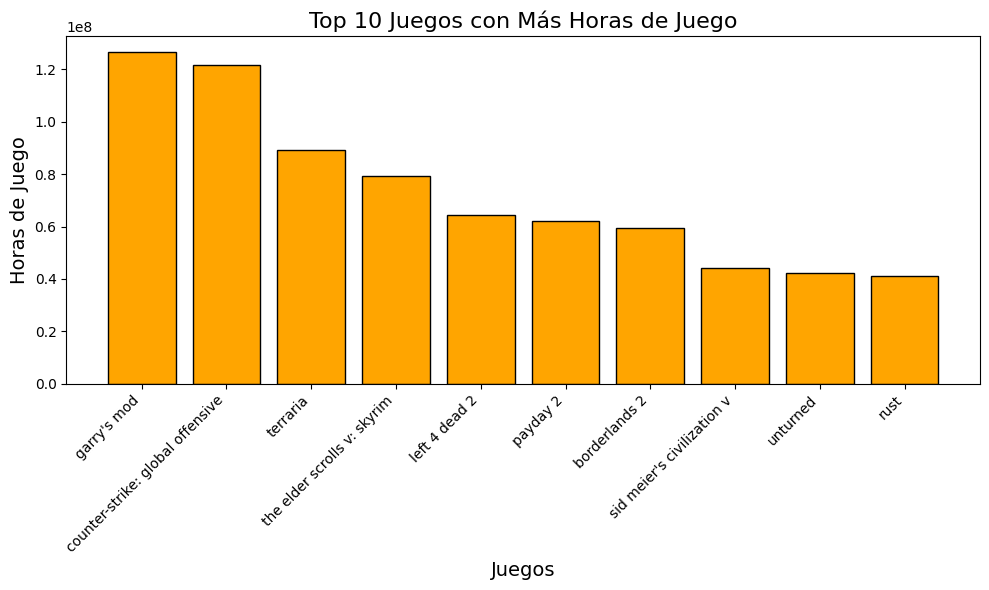

In [22]:
# Agrupa por 'item_name' y suma las horas de juego
agrupado_por_juego = df_items.groupby('item_name')['playtime_forever'].sum()

# Ordena el DataFrame resultante en orden descendente
juegos_con_mas_horas = agrupado_por_juego.sort_values(ascending=False)

# Toma los primeros 10 juegos con más horas de juego
top_juegos_horas = juegos_con_mas_horas.head(10)

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_juegos_horas.index, top_juegos_horas, color='orange', edgecolor='black')
plt.title('Top 10 Juegos con Más Horas de Juego', fontsize=16)
plt.xlabel('Juegos', fontsize=14)
plt.ylabel('Horas de Juego', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Esta grafica nos muestra los videojuegos mas jugados a lo largo del tiempo lo cual nos hace concluir cuales son los emjores jeugos y asi tomar desiciones hacia el futuro en cuestion de lanzamientos relacionados a los gustos de los jugadores

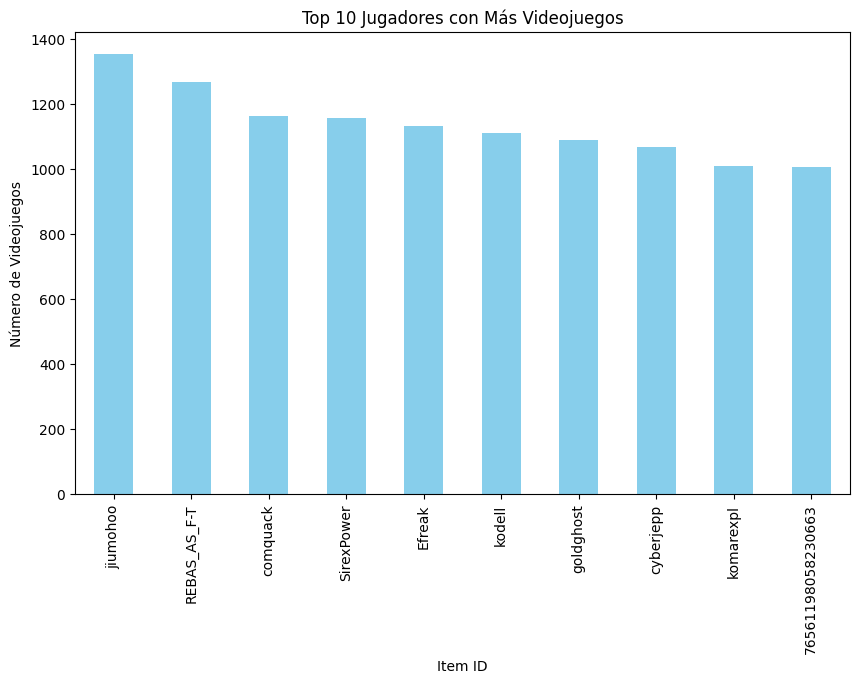

In [23]:
top_items = df_items['user_id'].value_counts().head(10)

# Graficar los resultados
plt.figure(figsize=(10, 6))
top_items.plot(kind='bar', color='skyblue')
plt.title('Top 10 Jugadores con Más Videojuegos')
plt.xlabel('Item ID')
plt.ylabel('Número de Videojuegos')
plt.show()

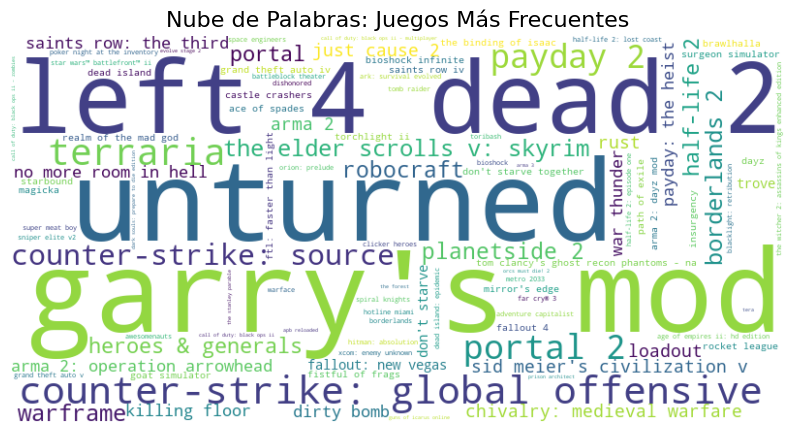

In [24]:
# Nube de palabras con los videojuegos mas comprados
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Agrupa por 'item_name' y cuenta la frecuencia de cada juego
frecuencia_juegos = df_items['item_name'].value_counts()

# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate_from_frequencies(frecuencia_juegos)

# Muestra la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras: Juegos Más Frecuentes', fontsize=16)
plt.show()


Aca tenemos una nube de palabras donde nos resaltan juegos como "Left 4 dead 2" y "unturned" como los juegos mas comprados por los usuarios 

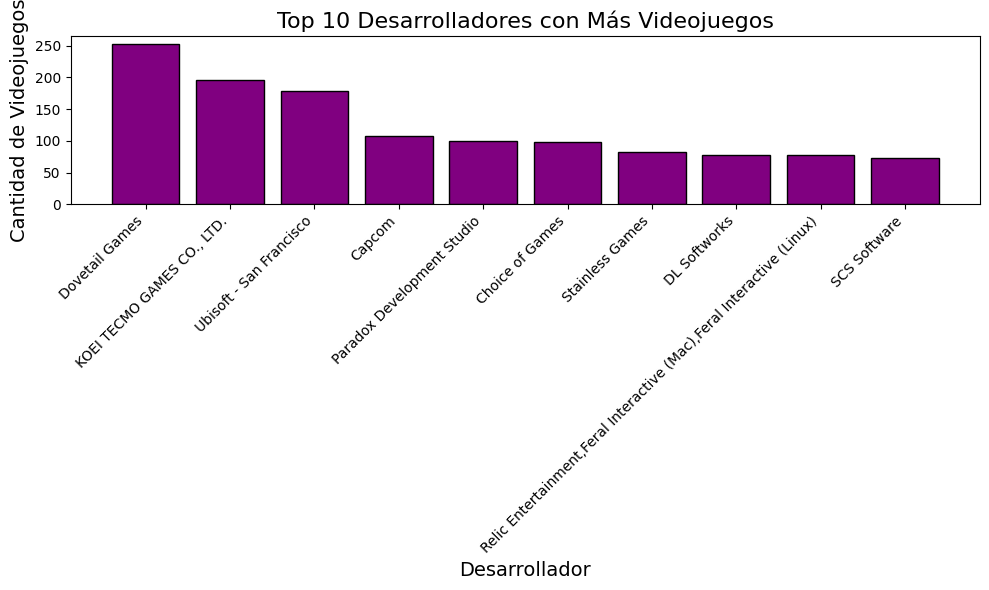

In [25]:
# Desarrolladores con mas juegos
# Agrupa por 'developer' y cuenta la cantidad de videojuegos por desarrollador
conteo_por_desarrollador = df_games['item_id'].groupby(df_games['developer']).nunique()

# Ordena el DataFrame resultante en orden descendente
desarrolladores_con_mas_juegos = conteo_por_desarrollador.sort_values(ascending=False)

# Toma los primeros 10 desarrolladores con más videojuegos
top_desarrolladores = desarrolladores_con_mas_juegos.head(10)

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_desarrolladores.index, top_desarrolladores, color='purple', edgecolor='black')
plt.title('Top 10 Desarrolladores con Más Videojuegos', fontsize=16)
plt.xlabel('Desarrollador', fontsize=14)
plt.ylabel('Cantidad de Videojuegos', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Esta grafica nos muestra los desarrolladores con mas videojuegos en la plataforma

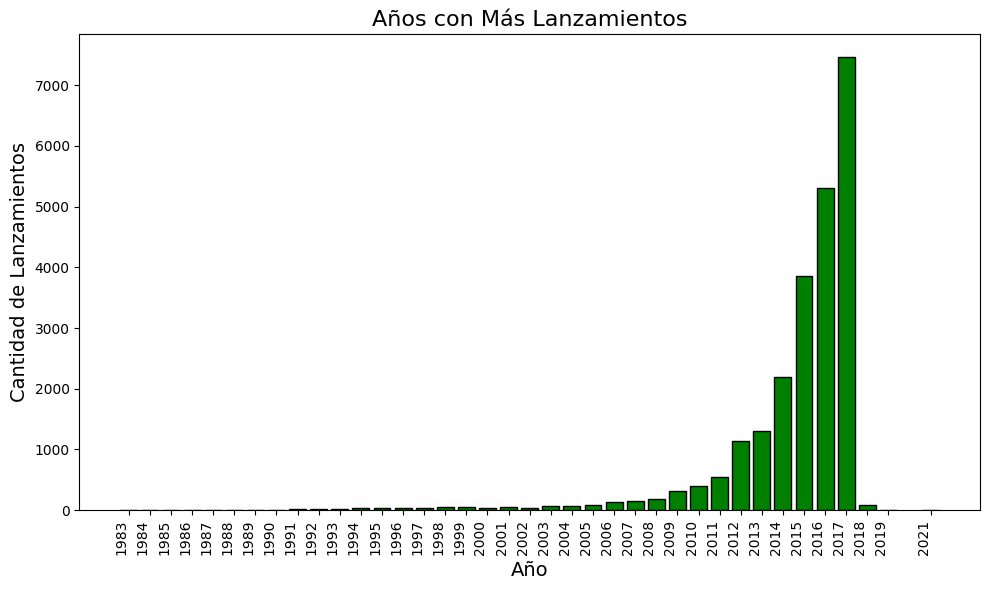

In [26]:
# Anios con mas lanzamientos
df = df_games

# Convierte la columna 'release_date' al tipo de dato datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Extrae el año de la fecha y crea una nueva columna 'year'
df['year'] = df['release_date'].dt.year

# Elimina las filas con fechas nulas
df = df.dropna(subset=['year'])

# Agrupa por año y cuenta la cantidad de lanzamientos por año
lanzamientos_por_anio = df['item_id'].groupby(df['year']).count()

# Ordena el DataFrame resultante en orden descendente
anios_con_mas_lanzamientos = lanzamientos_por_anio.sort_values(ascending=False)

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(anios_con_mas_lanzamientos.index.astype(int), anios_con_mas_lanzamientos, color='green', edgecolor='black')
plt.title('Años con Más Lanzamientos', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Cantidad de Lanzamientos', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.xticks(anios_con_mas_lanzamientos.index.astype(int), rotation=90, ha='right')
plt.tight_layout()
plt.show()


Esta grafica nos indica un crecimiento considerable entre los años 2012 y 2017 donde han sido los años con mas lanzamientos por parte de la empresas derrolladoras

C:\Users\USER\AppData\Local\Temp\ipykernel_16844\2794919558.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres'] = df['genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)


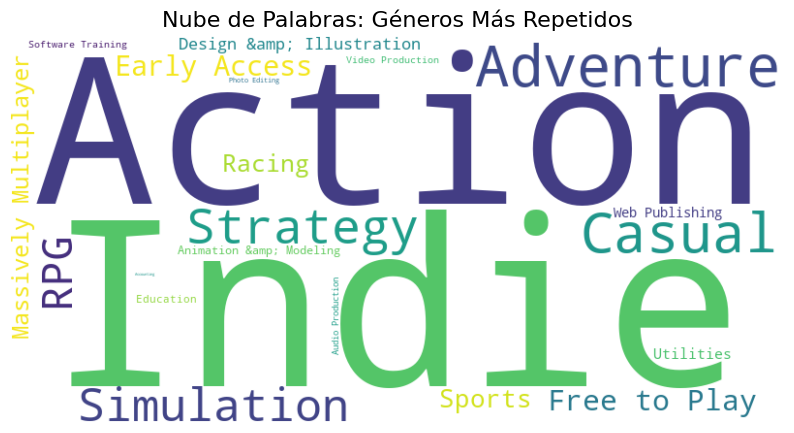

In [27]:
# Nube de palabras de los generos con mas videojuegos

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd


# Convertir las cadenas de 'genres' a listas
df['genres'] = df['genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Convertir la columna 'genres' a listas y combinar todas las listas en una sola lista
todos_los_generos = [generos for lista_generos in df['genres'].dropna() for generos in lista_generos]

# Contar la frecuencia de cada género
frecuencia_generos = pd.Series(todos_los_generos).value_counts()

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate_from_frequencies(frecuencia_generos)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras: Géneros Más Repetidos', fontsize=16)
plt.show()


Para terminar podemos ver los generos mas jugados por los usuarios donde destacan generos como la accion e indie

# Guardar los archivos con sus respectivas modificaciones

In [28]:
df_reviews.to_parquet(r'reviews_eda.parquet',index=False)
df_items.to_parquet(r'items_eda.parquet',index=False)
df_games.to_parquet(r'games_eda.parquet',index=False)